In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/DataSet/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Text Preprocessing

### Noise Removal

Any text that is unrelated to the context of the data and
the final result might be designated as noise. The general
technique to noise removal is to create a dictionary of noise
entities, then loop through the text object by tokens (or words), removing those tokens that are in the noise dictionary.

### Lexicon Normalization

Another sort of textual noise concerns the many
representations that a single word can exhibit. For example,
the words ”player”, ”play”, ”playing”, ”played” and ”plays”
are all versions of the word ”play”. The step transforms
a word’s discrepancies into their normalised version (also
known as lemma). Normalization is an important step in text
feature engineering because it reduces high-dimensional (N
number of features) features to a low-dimensional space (1
feature), which is perfect for any machine learning model.

Common Lexicon normalization techniques are as follows.

1) Stemming: Stemming is a simple rule-based technique
for removing suffixes from a word (e.g., ”es”, ”s”, ”ly”,
”ing”, and so on).

2) Lemmatization: Lemmatization is a way of acquiring
the root form of a word that uses lexicon and morphological
analysis.

3) Stop Word Removal: Some NLP applications, such as
sentiment analysis and text summarization, require stop word
removal as a preprocessing step. A basic yet crucial step is
to remove stop words as well as regularly recurring terms.

In [7]:
#Cleaning the text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,10000):
    review=re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
corpus=pd.DataFrame(corpus, columns=['Reviews']) 
corpus.head()

,Reviews
0,bought sever vital can dog food product found ...
1,product arriv label jumbo salt peanut peanut a...
2,confect around centuri light pillowi citru gel...
3,look secret ingredi robitussin believ found go...
4,great taffi great price wide assort yummi taff...


In [9]:
result=corpus.join(df[['Score']])
result.head()

,Reviews,Score
0,bought sever vital can dog food product found ...,5
1,product arriv label jumbo salt peanut peanut a...,1
2,confect around centuri light pillowi citru gel...,4
3,look secret ingredi robitussin believ found go...,2
4,great taffi great price wide assort yummi taff...,5


# Statistical Features

Text data can also be directly quantified into numbers using the following methods:

###### Term Frequency-Inverse Term Frequency(TF-IDF)

The TF-IDF model is a weighted model used to solve information retrieval challenges. Its goal is to convert text documents into vector models based on the occurrence of words in the texts rather than the exact sequence. Let's imagine there's a dataset of N text documents. TF and IDF will be defined as – in any document "D."

Term Frequency (TF) is defined as the number of times a term "t" appears in a document "D."

IDF for a term is defined as the logarithm of the ratio of total documents available in the corpus to the number of documents containing the term T.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(result['Reviews'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [11]:
X=tfidf.transform(result['Reviews'])
result['Reviews'][1]

'product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo'

In [12]:
[X[1, tfidf.vocabulary_['jumbo']]]

[0.5727828521365451]

In [13]:
[X[1, tfidf.vocabulary_['peanut']]]

[0.37509695630835344]

In [14]:
[X[1, tfidf.vocabulary_['product']]]

[0.17725742307805722]

TF-IDF assigns the term 'jumbo' the most weight out of three words: 'jumbo,' 'peanut,' and 'product.' This suggests that 'jumbo' is a far more uncommon term than 'peanut' or 'product.' This is an example of how to utilise the tf-idf to show the relevance of words or keywords within a set of documents.

# Sentiment Classification

The neutral class 3 is removed here and classes 1 and 2 are combined for Negative class and 4 and 5 are combined for Positive class.

In [15]:
import numpy as np
result.dropna(inplace=True)
result[result['Score'] != 3]
result['Positivity'] = np.where(result['Score'] > 3, 1, 0)
cols = [ 'Score']
result.drop(cols, axis=1, inplace=True)
result.head()

,Reviews,Positivity
0,bought sever vital can dog food product found ...,1
1,product arriv label jumbo salt peanut peanut a...,0
2,confect around centuri light pillowi citru gel...,1
3,look secret ingredi robitussin believ found go...,0
4,great taffi great price wide assort yummi taff...,1


In [16]:
result.groupby('Positivity').size()

Positivity
0    2384
1    7616
dtype: int64

### Test-Train Split

In [17]:
from sklearn.model_selection import train_test_split
X = result.Reviews
y = result.Positivity
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [18]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 7500 entries with 23.57% negative, 76.43% positive


In [19]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 2500 entries with 24.64% negative, 75.36% positive


You've probably observed that our classes are unbalanced, with a negative to positive ratio of 22:78.

We are using the Random Forest classifier to learn imbalanced data and set class weight=balanced as one of the techniques for countering imbalanced classes.

To begin, create a function that will print the accuracy score.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

We need a lot of features to perform effective sentiment
analysis or solve any NLP challenge. It’s difficult to determine
the exact amount of features required. So I tried 10,000 to
30,000 features. And printed out the accuracy scores that
correspond to the number of features.

In [21]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,25001,5000)

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [23]:
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Test result for 10000 features
accuracy score: 84.08%
Test result for 15000 features
accuracy score: 84.28%
Test result for 20000 features
accuracy score: 83.60%
Test result for 25000 features
accuracy score: 83.48%


In [24]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=30000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.90      0.36      0.51       616
    positive       0.82      0.99      0.90      1884

    accuracy                           0.83      2500
   macro avg       0.86      0.67      0.70      2500
weighted avg       0.84      0.83      0.80      2500



# Chi-squared for feature selection

In machine learning, feature selection is a critical issue. We'll compute Chi square scores for all of the features and visualise the top 20, where terms, words, and N-grams are features, and positive and negative are two classes. The Chi square test can be used to assess the relevance of a property X in distinguishing a class.

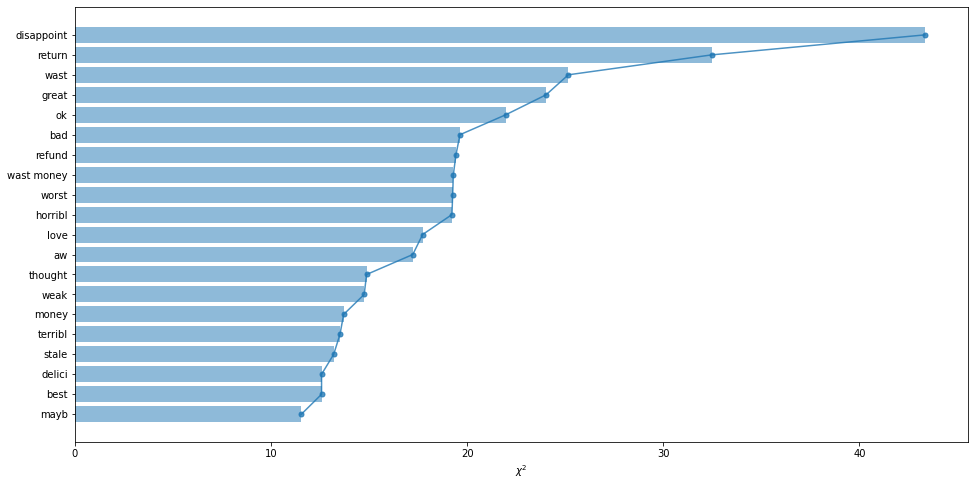

In [25]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(result.Reviews)
y = result.Positivity
chi2score = chi2(X_tfidf, y)[0]
plt.figure(figsize=(16,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

# LSTM Framework

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

### Pad Sequences

All input documents must be the same length in order to feed this data into our RNN. We'll truncate longer reviews and pad shorter ones with a null value to keep the maximum review length at max words (0). The pad sequences() function in Keras can help us do this. Set max words for the time being. Then I set the maximum number of features to 30000 and use Tokenizer to vectorize and turn text into Sequences so that the Network can handle it.

In [27]:
max_fatures = 30000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(result['Reviews'].values)
X1 = tokenizer.texts_to_sequences(result['Reviews'].values)
X1 = pad_sequences(X1)
Y1 = pd.get_dummies(result['Positivity']).values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


(7500, 932) (7500, 2)
(2500, 932) (2500, 2)


# Designing an RNN model for sentiment analysis

Remember that our input is a string of words (technically, integer word IDs) with a maximum length of max words and a binary sentiment label as the output (0 or 1).

### Keras Embedding Layer

Keras has an Embedding layer for text data that may be utilised with neural networks.

It necessitates integer encoding of the input data, with each word represented by a distinct number. The Tokenizer API, which comes with Keras, can be used to execute this data preparation step.

The Embedding layer starts with random weights and learns an embedding for every word in the training dataset.

It's a versatile layer that may be utilised in a number of ways, including:

1. It can be used on its own to learn a word embedding that can then be stored and reused in a subsequent
model.
2. It can be used as part of a deep learning model that
learns the embedding as well as the model. 
3. It can be used to load a word embedding model that has already been trained, which is a sort of transfer learning.

The first hidden layer of a network is known as the embedding layer. It must include three arguments:

####input_dim
This is the number of words in the text data's vocabulary. For example, if your data is integer encoded with values ranging from 0 to 10, your vocabulary will be 11 words long.

#####output_dim
The size of the vector space in which words will be embedded is this. It specifies the size of each word's output vectors from this layer. It may, for example, be 32, 100, or even higher.

####input_length
This is the length of input sequences, as defined for every Keras model input layer. If all of your input documents contain 1000 words, for example, this would be 1000.

Here, we build an Embedding layer with a vocabulary of (e.g., integer encoded words ranging from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents each containing 50 words.

e = Embedding(200, 32, input_length=50)

Weights are learned in the Embedding layer. If you save your model as a file, the weights for the Embedding layer will be included. The Embedding layer produces a 2D vector with one embedding for each word in the input word sequence (input document).

If you want to connect a Dense layer to an Embedding layer directly, you must first use the Flatten layer to convert the 2D output matrix to a 1D vector.

In [28]:
from keras.layers import Dropout


In [29]:
embed_dim = 150
lstm_out = 200
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, recurrent_dropout=0.2,dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 932, 150)          4500000   
_________________________________________________________________
dropout (Dropout)            (None, 932, 150)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               280800    
_________________________________________________________________
dense (Dense)                (None, 2)                 402       
Total params: 4,781,202
Trainable params: 4,781,202
Non-trainable params: 0
_________________________________________________________________
None


To conclude, our model consists of a single embedding, one LSTM, and one dense layer. A total of 4,781,202 parameters must be trained.

# Training and Evaluating the Model

To begin, we must build our model by defining the loss function and optimizer we want to utilise during training, as well as any evaluation metrics we wish to track. Provide the necessary parameters, including at least one measure called "accuracy."

In [30]:
batch_size = 32
model.fit(X1_train, Y1_train, epochs = 3, batch_size=batch_size, verbose = 2)

Epoch 1/3
235/235 - 1194s - loss: 0.4652 - accuracy: 0.7971
Epoch 2/3
235/235 - 1171s - loss: 0.2694 - accuracy: 0.8892
Epoch 3/3
235/235 - 1153s - loss: 0.1675 - accuracy: 0.9340


In [31]:
score,acc = model.evaluate(X1_test, Y1_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

79/79 - 46s - loss: 0.4380 - accuracy: 0.8496
score: 0.44
acc: 0.85


In [32]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X1_test)):
    
    result = model.predict(X1_test[x].reshape(1,X1_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y1_test[x]):
        if np.argmax(Y1_test[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y1_test[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

1/1 - 1s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1